# Data Preprocessing
Sebelum melakukan visualisasi pada data, akan dilakukan data preprocessing terlebih dahulu supaya data yang ditampilkan dapat terjamin kualitasnya.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from wordcloud import WordCloud

In [3]:
df = pd.read_csv('london_crime_by_lsoa.csv')

print(df)

          lsoa_code     borough               major_category  \
0         E01001116     Croydon                     Burglary   
1         E01001646   Greenwich  Violence Against the Person   
2         E01000677     Bromley  Violence Against the Person   
3         E01003774   Redbridge                     Burglary   
4         E01004563  Wandsworth                      Robbery   
...             ...         ...                          ...   
13490599  E01000504       Brent              Criminal Damage   
13490600  E01002504  Hillingdon                      Robbery   
13490601  E01004165      Sutton                     Burglary   
13490602  E01001134     Croydon                      Robbery   
13490603  E01003413      Merton  Violence Against the Person   

                       minor_category  value  year  month  
0         Burglary in Other Buildings      0  2016     11  
1                      Other violence      0  2016     11  
2                      Other violence      0  2015 

## Menghitung jumlah data yang null

In [3]:
df.isnull().sum().sum()

0

Karena dataframe tersebut tidak memiliki nilai null, tidak ada data yang akan dihapus.

## Menghitung jumlah data yang duplikat

In [4]:
df.duplicated().sum()

0

Karena dataframe tersebut tidak memiliki nilai yang duplikat, tidak ada data yang akan dihapus.

## Menghapus entry data yang valuenya 0
Karena terdapat banyak laporan yang jumlah frekuensi dari kasus yang bersangkutan adalah 0, entry-entry data tersebut akan dihapus untuk meringankan beban kerja komputer.

In [4]:
df.drop(df[df['value'] == 0].index, inplace = True)
print(df)

          lsoa_code               borough               major_category  \
9         E01004177                Sutton           Theft and Handling   
16        E01000086  Barking and Dagenham           Theft and Handling   
24        E01001301                Ealing           Theft and Handling   
25        E01001794               Hackney  Violence Against the Person   
32        E01000733               Bromley              Criminal Damage   
...             ...                   ...                          ...   
13490581  E01000789               Bromley  Violence Against the Person   
13490584  E01003301              Lewisham  Violence Against the Person   
13490590  E01001679             Greenwich           Theft and Handling   
13490592  E01033327              Lewisham  Violence Against the Person   
13490600  E01002504            Hillingdon                      Robbery   

                            minor_category  value  year  month  
9              Theft/Taking of Pedal Cycle    

# Area Plot

Area plot merupakan istilah turunan dari line plot yang mana pada area plot, area di bawah line plot diarsir dan diberikan visualisasi pewarnaan tertentu. Penggunaan area plot efektif untuk sebagai berikut. 

- Menunjukkan perbandingan jumlah suatu variabel dengan variabel lain terhadap variable pembanding yang sama.
- Menunjukkan jumlah akumulasi suatu variabel seiringan dengan variabel lain.

Pada kesempatan kali ini, akan dibuat area plot yang menunjukkan **pembagian kejadian Burglary untuk setiap minor categories yang dimiliki yang terjadi setiap tahun.**

In [27]:
temp = df[(df['major_category'] == "Burglary")]['minor_category'].unique()
print(temp)

['Burglary in a Dwelling' 'Burglary in Other Buildings']


Karena minor category untuk Burglary hanya Burglary in a Dwelling dan Burglary in Other Buildings, akan dicari jumlah value per tahun untuk kedua minor category tersebut.

In [14]:
area_df1 = df[df['minor_category'] == "Burglary in a Dwelling"]
area_df1 = area_df1[['year', 'value']].groupby(['year']).sum()

area_df1.reset_index(inplace=True)

area_df1.head()

,year,value
0,2008,56655
1,2009,60185
2,2010,57123
3,2011,62439
4,2012,61716


In [15]:
area_df2 = df[df['minor_category'] == "Burglary in Other Buildings"]
area_df2 = area_df2[['year', 'value']].groupby(['year']).sum()

area_df2.head()

,value
year,
2008,31437
2009,30434
2010,29703
2011,30876
2012,31676


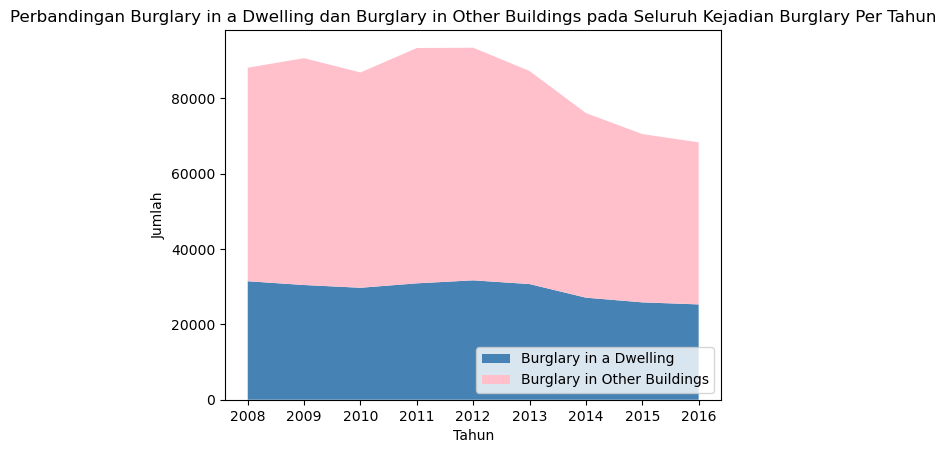

In [19]:
fig, ax = plt.subplots()

color_map = ['steelblue', 'pink']

plt.stackplot(area_df1['year'], area_df2['value'], area_df1['value'], labels=['Burglary in a Dwelling', 'Burglary in Other Buildings'], colors=color_map)
plt.title('Perbandingan Burglary in a Dwelling dan Burglary in Other Buildings pada Seluruh Kejadian Burglary Per Tahun')
plt.ylabel('Jumlah')
plt.xlabel('Tahun')
plt.legend(loc='lower right')
plt.show()

## Kesimpulan
Kejadian Burglary in Other Buildings lebih banyak daripada Burglary in a Dwelling. Hal ini terlihat dari Burglary in Other Buildings (warna pink) yang memakan area lebih banyak dibandingkan Burglary in a Dwelling (warna biru) pada gambar. Luas area chart Burglary in Other a Dwelling tidak mencapai setengah dari area Burglary in Other Buildings. Maka dari itu, setiap tahun pun kejadiannya juga tidak lebih dari setengahnya.

# Histogram

Histogram adalah representasi grafis dari distribusi data numerik diskrit ataupun kontinu. Penggunaan histogram efektif untuk sebagai berikut. 

- Menunjukkan frekuensi dari distribusi
- Menyimpulkan data diskrit atau kontinu yang dihitung menggunakan interval

Pada kesempatan kali ini, akan dibuat histogram yang menunjukkan **jumlah kejadian Violence Against the Person pada setiap laporan di Bexley pada tahun 2012**

In [20]:
histogram_df = df[(df['year'] == 2012) & (df['major_category'] == "Violence Against the Person") 
                  & (df['borough'] == "Bexley")]
print(histogram_df)

          lsoa_code borough               major_category       minor_category  \
1748      E01000332  Bexley  Violence Against the Person  Assault with Injury   
5684      E01000333  Bexley  Violence Against the Person       Common Assault   
10256     E01000422  Bexley  Violence Against the Person  Assault with Injury   
12578     E01000368  Bexley  Violence Against the Person  Assault with Injury   
14694     E01000468  Bexley  Violence Against the Person       Common Assault   
...             ...     ...                          ...                  ...   
13432514  E01000430  Bexley  Violence Against the Person       Common Assault   
13432801  E01000358  Bexley  Violence Against the Person         Wounding/GBH   
13446044  E01000422  Bexley  Violence Against the Person           Harassment   
13465339  E01000408  Bexley  Violence Against the Person  Assault with Injury   
13471343  E01000422  Bexley  Violence Against the Person       Common Assault   

          value  year  mont

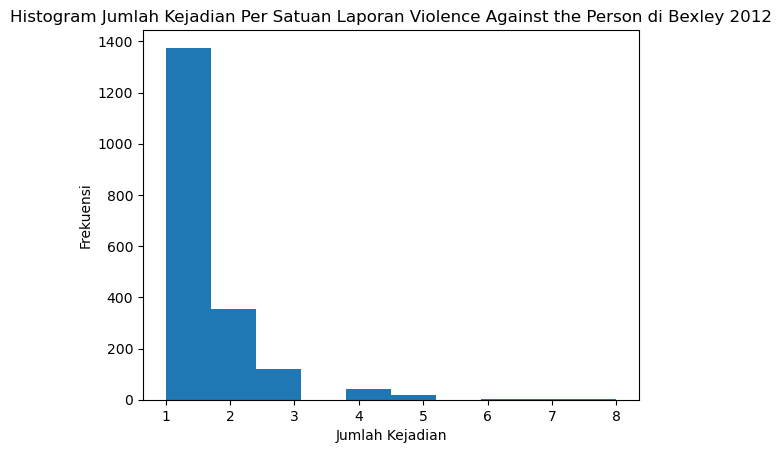

In [21]:
plt.hist(histogram_df['value'])
plt.title('Histogram Jumlah Kejadian Per Satuan Laporan Violence Against the Person di Bexley 2012')
plt.xlabel('Jumlah Kejadian')
plt.ylabel('Frekuensi')
plt.show()

## Kesimpulan
Dari sebanyak 1916 laporan kejahatan Violence Against the Person di Bexley 2012, kebanyakan dari laporan melaporkan hanya 1 kejadian. Kemudian, laporan yang melaporkan sekaligus 2 kejadian berkisar sekitar 400 laporan. Untuk laporan yang sekaligus melaporkan 3 kejadian, 4 kejadian dan 5 kejadian frekuensinya dibawah 200 laporan.

# Bar Chart
Bar chart mirip seperti Histogram. Perbedaannya ialah sumbu Y pada Bar Chart berupa data ordinal. Penggunaan bar chart efektif untuk sebagai berikut.

- Menekankan hubungan antara beberapa variabel terhadap waktu
- Menunjukkan keadaan naik dan turun pada suatu variabel terhadap variabel lain.

Pada kesempatan kali ini, akan dibuat bar chart yang menunjukkan **jumlah laporan setiap major_category di Greenwich pada tahun 2013**

In [59]:
bar_df = df[(df['year'] == 2013) & (df['borough'] == "Greenwich")]
bar_df = bar_df[['major_category', 'value']].groupby(['major_category']).sum()

bar_df.reset_index(inplace=True)

bar_df.head()

,major_category,value
0,Burglary,2369
1,Criminal Damage,2013
2,Drugs,1311
3,Other Notifiable Offences,387
4,Robbery,471


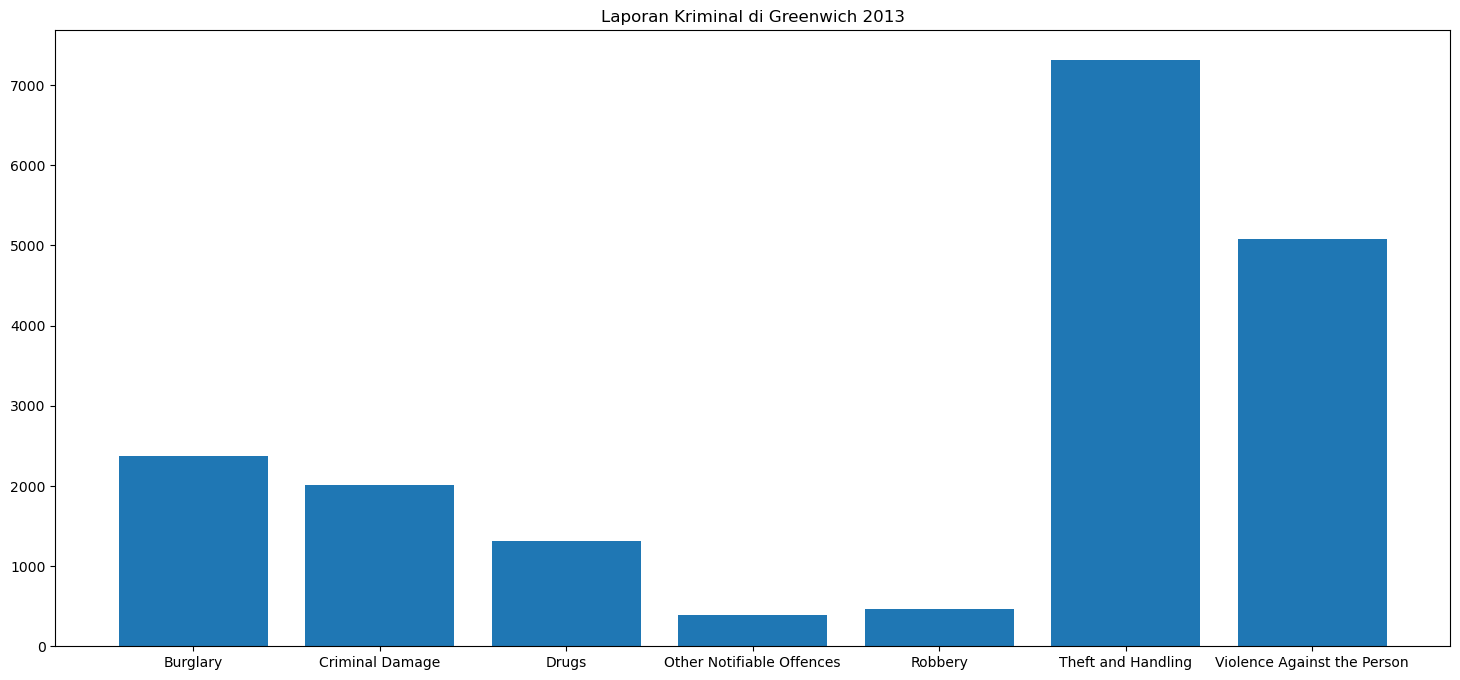

In [60]:
plt.figure(figsize=(18, 8))
plt.bar(bar_df['major_category'], bar_df['value'])
plt.title('Laporan Kriminal di Greenwich 2013')
plt.show()

## Kesimpulan
Laporan kejahatan yang paling banyak terjadi di Greenwich pada tahun 2013 adalah Theft dan Handling di angka lebih dari 7000. Setelah itu, disusul oleh Violence Against the Person sekitar 5000 kasus, dilanjut lagi secara berurutan oleh Burglary, Criminal Damage, Drugs, Other Notifiable Offences dan Robbery

# Pie Chart
Pie chart adalah visualisasi data berbentuk lingkaran. Pie chart cocok digunakan untuk merepresentasikan data-data sebagai persentase sebagai satu keseluruhan. Penggunaan pie chart efektif untuk sebagai berikut.

- Menunjukkan komposisi data pada orang awam.
- Pembaca dapat dengan mudah mengukur perbandingan dengan data lain.

Pada kesempatan kali ini, akan dibuat pie chart yang menunjukkan **persentase dari setiap minor_category pada Violence Against the Person di tahun 2010**

In [51]:
pie_df = df[(df['year'] == 2010) & (df['major_category'] == "Violence Against the Person")]
pie_df = pie_df[['minor_category', 'value']].groupby(['minor_category']).sum()

pie_df.reset_index(inplace=True)

pie_df.head()

,minor_category,value
0,Assault with Injury,54173
1,Common Assault,41591
2,Harassment,42808
3,Murder,113
4,Offensive Weapon,4229


Text(0.5, 1.0, 'Persentase Minor Category dari Major Category Violence pada Tahun 2010')

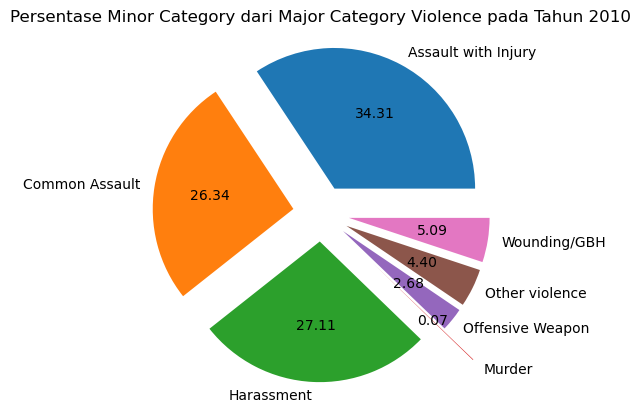

In [79]:
plt.pie(pie_df['value'], labels=pie_df['minor_category'],
       autopct='%.2f', explode=(0.2, 0.2, 0.2, 0.5, 0.2, 0.2, 0.2)
       )
plt.axis('equal')
plt.title('Persentase Minor Category dari Major Category Violence pada Tahun 2010')


## Kesimpulan
Minor category yang paling banyak terjadi pada major category violence pada tahun 2010 adalah assault with injury yang terdiri dari 34.31% dari seluruh laporan violence yang masuk.

# Box Plot
Box plot adalah tipe chart yang digunakan pada penjelasan analisis data untuk memvisualisasikan distribusi, skewness, outliers dan median data. Penggunaan box plot efektif untuk sebagai berikut.

- Menunjukkan distribusi data terhadap beberapa variabel
- Menjelaskan deskriptif statistik secara visual

Pada kesempatan kali ini, akan dibuat box plot yang menunjukkan **persebaran value (banyak kejadian) violence pada sekali laporan setiap bulan di Haringey pada tahun 2009**

Text(0.5, 0, 'Banyak Kejadian')

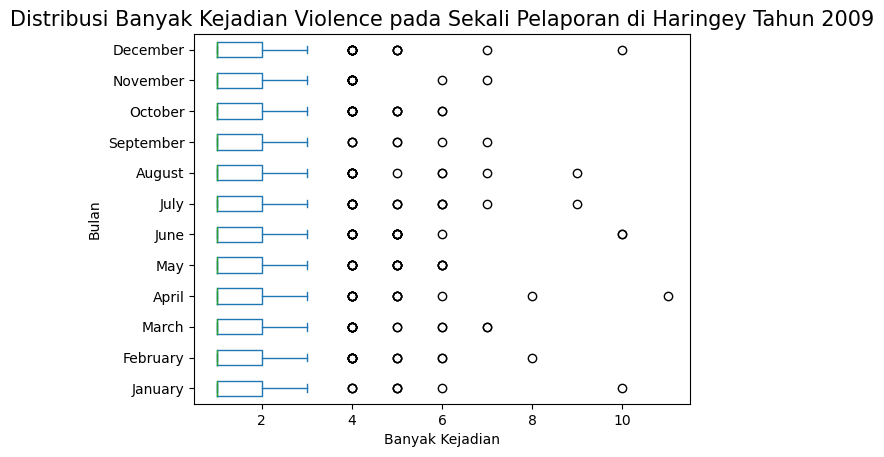

In [109]:
boxplot_df = df[(df['year'] == 2009) & (df['major_category'] == "Violence Against the Person")
               & (df['borough'] == "Haringey")]
boxplot_df = boxplot_df[['value', 'month']]
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
        'August', 'September', 'October', 'November', 'December']
dict_ = {}

for x in range(1, 13):
    temp = boxplot_df[boxplot_df['month'] == x]['value']
    temp = pd.DataFrame([temp]).transpose()
    to_list = temp['value'].tolist()
    dict_[month[x-1]] = to_list

df_ans = pd.DataFrame.from_dict(dict_, orient='index').dropna(axis=1)

(df_ans.transpose()).plot(kind='box', vert=False)
plt.title('Distribusi Banyak Kejadian Violence pada Sekali Pelaporan di Haringey Tahun 2009', size=15)
plt.ylabel('Bulan')
plt.xlabel('Banyak Kejadian')

## Kesimpulan


Banyak kejadian violence yang terjadi pada suatu pelaporan di Haringey kemungkinan berjumlah 1 sampai 2 kasus. Median untuk setiap bulan adalah 1. Sementara itu, outlier berada pada 4 dan lebih kejadian. 

# Scatter Plot
Scatter plot adalah tipe chart yang menggambarkan persebaran suatu data terhadap suatu variabel lain. Penggunaan scatter plot efektif untuk sebagai berikut.

- Menyajikan visualisasi statistik tentang persebaran data.
- Mengetes dan visualisasi kuatnya hubungan antara dua variabel.

Pada kesempatan kali ini, akan dibuat scatter plot yang menunjukkan **persebaran dan hubungan value (banyak kejadian) dengan tahun pada minor category Theft From Shops pada borouogh Barnet dari tahun 2010 sampai 2016**

In [14]:
scatter_df = df[(df['minor_category'] == "Theft From Shops") & (df['year'] >= 2010) & (df['year'] <= 2016) 
                & (df['borough'] == "Barnet")]
scatter_df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
973,E01000164,Barnet,Theft and Handling,Theft From Shops,2,2016,5
3218,E01000223,Barnet,Theft and Handling,Theft From Shops,1,2016,2
4827,E01000260,Barnet,Theft and Handling,Theft From Shops,1,2011,7
12993,E01000233,Barnet,Theft and Handling,Theft From Shops,1,2010,5
14226,E01000264,Barnet,Theft and Handling,Theft From Shops,6,2011,2


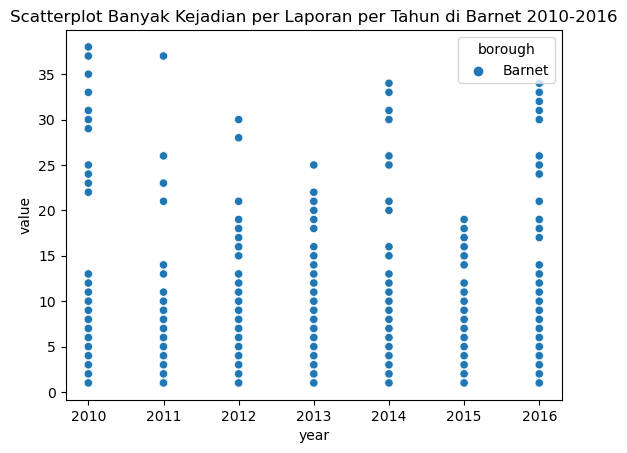

In [61]:
sns.scatterplot(data=scatter_df, x="year", y="value", hue="borough")
plt.title('Scatterplot Banyak Kejadian per Laporan per Tahun di Barnet 2010-2016')
plt.show()

## Kesimpulan
Terlihat bahwa hubungan antara value dan year tidak menunjukkan indikasi hubungan kuat karena pola persebaran yang cenderung acak secara progresif setiap tahunnya. Tahun 2015 adalah tahun di mana value mengalami persebaran paling kecil dibandingkan tahun-tahun lainnya.

# Word Clouds
Word clouds adalah representasi visual dengan menggunakan teks. Penggunaan scatter plot efektif untuk sebagai berikut.

- Menyajikan visualisasi statistik secara estetika.
- Menyajikan visualisasi persebaran data yang dapat dengan mudah dipahami orang awam.

Pada kesempatan kali ini, akan dibuat scatter plot yang menunjukkan **word clouds dari banyaknya kejadian setiap major category pada tahun 2016 di Waltham Forest**

In [18]:
word_df = df[(df['year'] == 2016) & (df['borough'] == "Waltham Forest")][['major_category', 'value']]
word_df = word_df.groupby(['major_category']).sum()
word_df.head()

,value
major_category,
Burglary,1873
Criminal Damage,1989
Drugs,1042
Other Notifiable Offences,444
Robbery,602


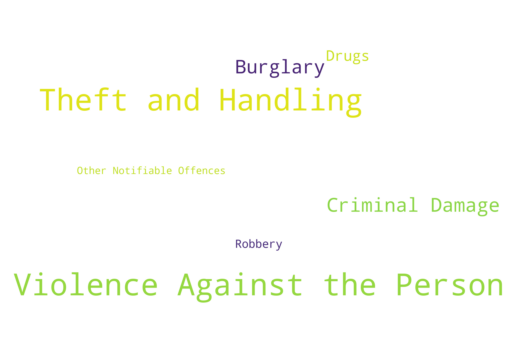

In [30]:
wordcloud = WordCloud(background_color="white", width=3000, height=2000, max_words=500).generate_from_frequencies(word_df['value'])
plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')

## Kesimpulan
Pada visualisasi word cloud di atas, terlihat bahwa Theft and Handling beserta Violence Against the Person adalah major category terbanyak pada laporan kriminal di Waltham Forest pada tahun 2016

# Folium
Folium adalah representasi visual dengan menggunakan peta. Penggunaan folium efektif untuk sebagai berikut.

- Menyajikan visualisasi data pada peta.
- Melakukan binding data dengan peta.

Pada kesempatan kali ini, akan dibuat folium yang menunjukkan **lokasi Westminster dan banyaknya kasus Theft and Handling yang terjadi di sana pada tahun 2016**

In [56]:
word_df = df[(df['year'] == 2016) & (df['borough'] == "Westminster") & 
             (df['major_category'] == "Theft and Handling")]
word_df = word_df[['major_category', 'value']].groupby(['major_category']).sum()

temp = word_df['value'].iloc[0]

word_df.head()

,value
major_category,
Theft and Handling,27520


In [57]:
world_map = folium.Map(location=[51.509865, -0.118092], zoom_start=11)
incidents = folium.map.FeatureGroup()
folium.Marker([51.494720, -0.13527], popup="Theft and Handling Case: "+str(temp), tooltip="Westminster").add_to(world_map)
world_map

## Kesimpulan
Sesuai pada folium di atas, ternyata Westminster adalah borough yang berada di tengah kota London dan memiliki laporan Theft and Handling sebanyak 27520 pada tahun 2016.